# INTRODUCTION

The objective of the study is to analyse the flight booking dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. 'Easemytrip' is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

# FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Clean_Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


Most used flight in airlines

In [11]:
df['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

Top 7 source city and the destination by price.

In [12]:
a = df.groupby(['source_city','destination_city'])['price'].sum().reset_index().sort_values(['price'],ascending=False)
a[0:7]

,source_city,destination_city,price
4,Bangalore,Mumbai,299261197
25,Mumbai,Bangalore,298260354
14,Delhi,Mumbai,295931282
29,Mumbai,Kolkata,282022007
27,Mumbai,Delhi,277303264
24,Kolkata,Mumbai,253178558
10,Delhi,Bangalore,250537591


 Top 5 flights used in the airlines based on price.

In [13]:
b = df.groupby(['flight','airline'])['price'].count().reset_index().sort_values(['price'],ascending=False)
top_5_flights=b.head()

In [14]:
top_5_flights.head()

,flight,airline,price
1442,UK-706,Vistara,3235
1454,UK-772,Vistara,2741
1445,UK-720,Vistara,2650
1490,UK-836,Vistara,2542
1477,UK-822,Vistara,2468


Text(0.5, 1.0, 'Top 5 Flights and Airlines based on Price')

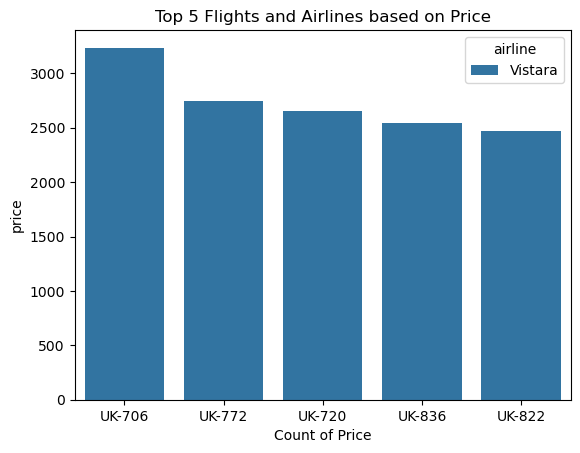

In [15]:
sns.barplot(x='flight',y='price',data=top_5_flights,hue='airline')
plt.xlabel('Flight')
plt.xlabel('Count of Price')
plt.title('Top 5 Flights and Airlines based on Price')

In [16]:
#Found out that:- MOST Flight Used IS UK-706 and most flights used is Vistara airlines

 How is the price affected when tickets are bought in just 1 or 2 days before departure?

In [17]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [18]:
last_min_day = df[df['days_left'].isin([1,2])]
last_min_price = last_min_day['price'].mean()
normal_price = df['price'].mean()

In [19]:
print(f"Average price of last-minute tickets (1 or 2 days before departure):- {last_min_price} ")
print(f"Overall average ticket price:-{normal_price}")
print(f'Estimated price difference of {last_min_price-normal_price} occurs')

Average price of last-minute tickets (1 or 2 days before departure):- 27421.169326390056 
Overall average ticket price:-20889.660523133203
Estimated price difference of 6531.508803256853 occurs


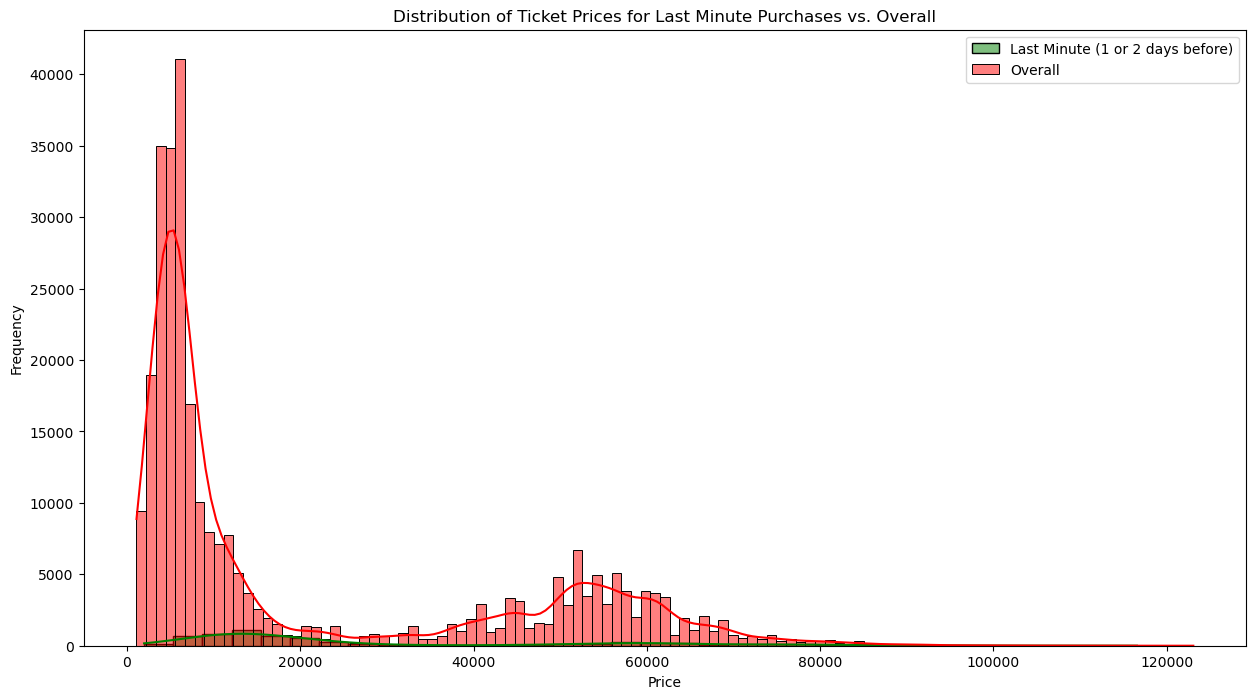

In [20]:
plt.figure(figsize=(15,8))
sns.histplot(last_min_day['price'], color='green', label='Last Minute (1 or 2 days before)', kde=True)
sns.histplot(df['price'], color='red', label='Overall', kde=True)

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Ticket Prices for Last Minute Purchases vs. Overall')
plt.legend()

Does ticket price change based on the departure time and arrival time?

<Figure size 2000x500 with 0 Axes>

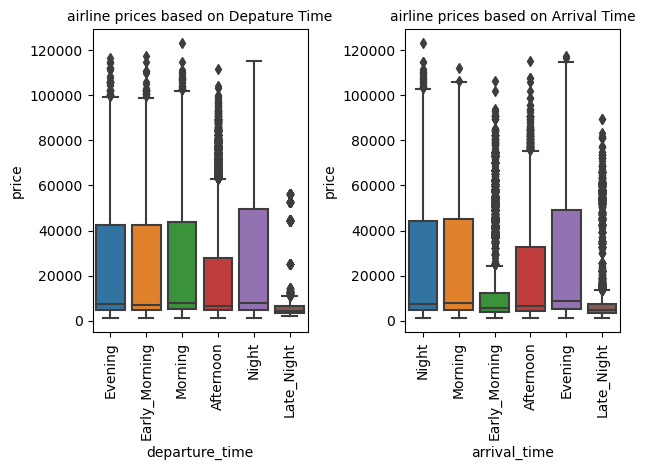

In [21]:
plt.figure(figsize=(20,5))
fig,axes = plt.subplots(1,2)
sns.boxplot(data=df, x='departure_time',y='price',ax=axes[0])
axes[0].set_title('airline prices based on Depature Time',fontsize=10)
axes[0].tick_params(axis='x', rotation=90)

sns.boxplot(data=df,x='arrival_time',y ='price',ax=axes[1])
axes[1].set_title('airline prices based on Arrival Time',fontsize=10)
axes[1].tick_params(axis='x', rotation=90)
plt.tight_layout()

In [22]:
#1:-The Most Popular Time of Deaptuee Is Morning And Least Popular Time Is Late_Night
#2:-The Most Popular Time of Arrival Is Evening And Least Popular Time Is Late_Night

How the price changes with change in Source and Destination?

C:\Users\shrid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\shrid\AppData\Local\Temp\ipykernel_19788\2150866193.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


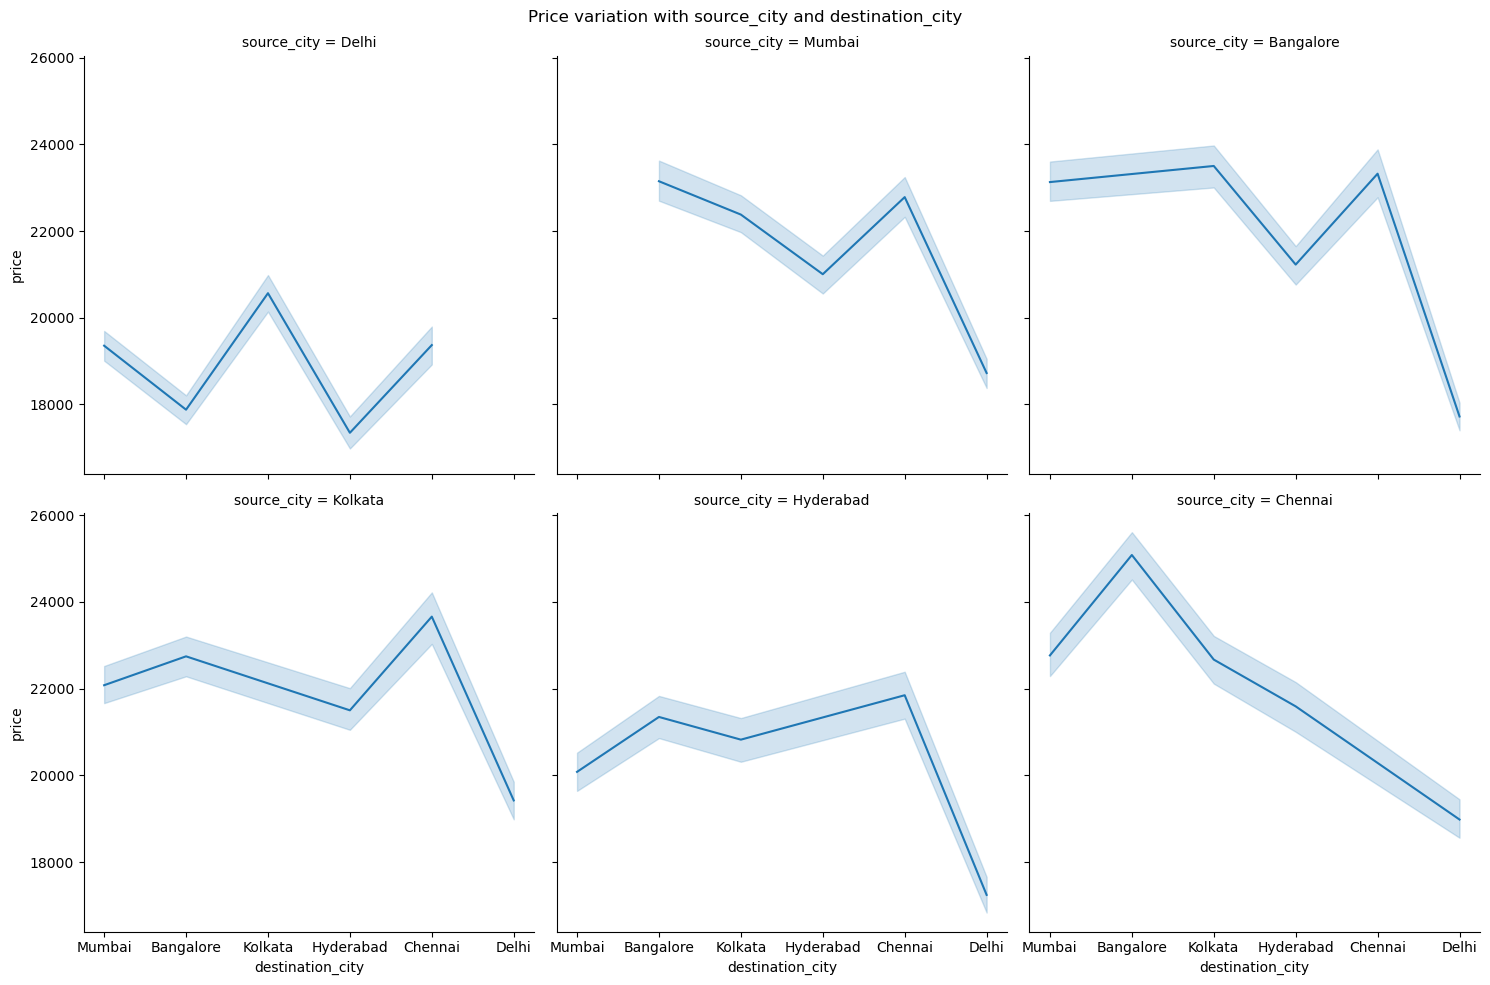

In [23]:
sns.relplot(col='source_city',x='destination_city',y='price',data=df,col_wrap=3,kind= 'line')
plt.suptitle('Price variation with source_city and destination_city')
plt.tight_layout()
plt.show()

In [24]:
#Finding:-From this graph,it implies that flight leaving and arriving at Delhi are often cheaper whereas flights leaving and arriving at Bangalore are the higher priced.

How does the ticket price vary between Economy and Business class?

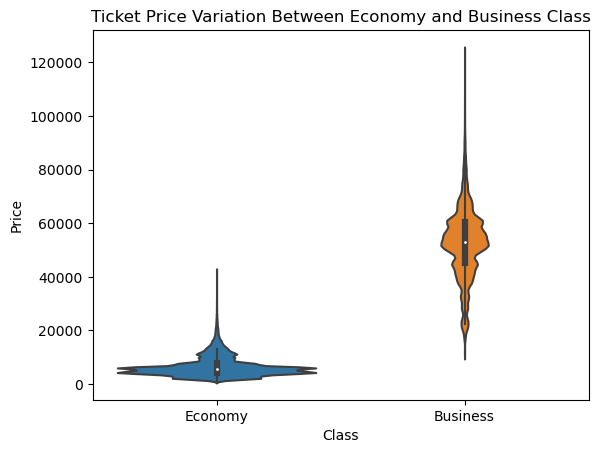

In [25]:
sns.violinplot(data=df, x='class', y='price')
plt.title('Ticket Price Variation Between Economy and Business Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

Lets check out how they vary with different airlines

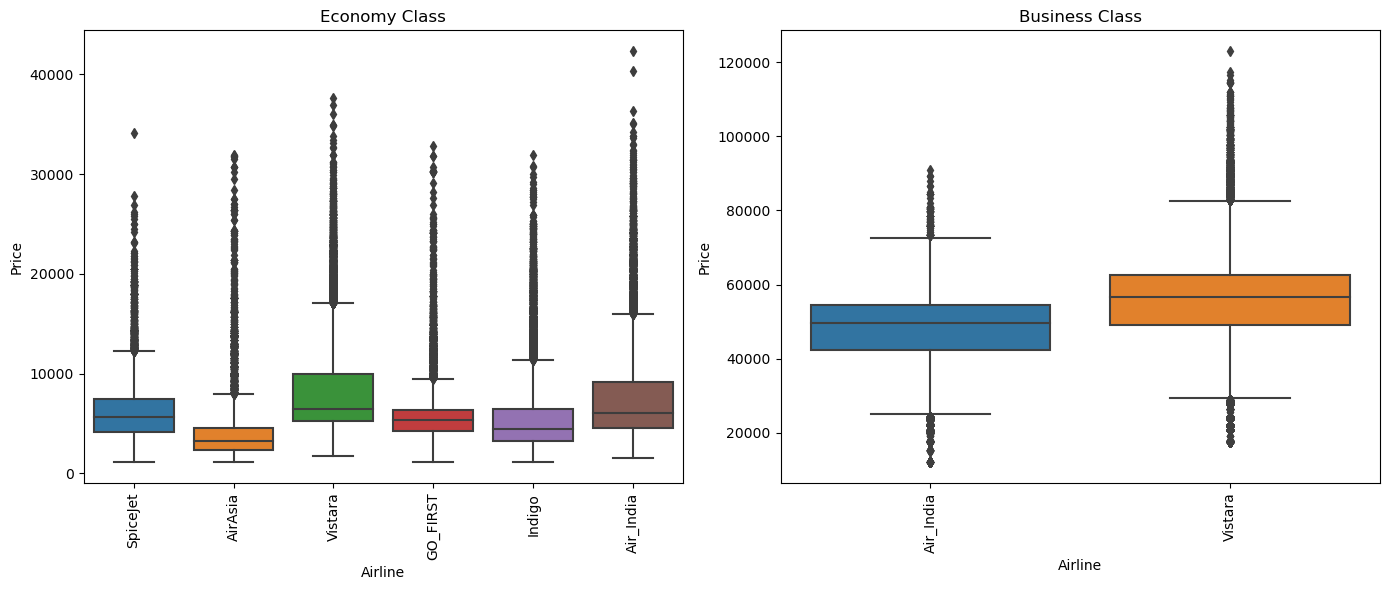

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for Economy class
sns.boxplot(data=df[df['class'] == 'Economy'], x='airline', y='price', ax=axes[0])
axes[0].set_title('Economy Class')
axes[0].set_xlabel('Airline')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot for Business class
sns.boxplot(data=df[df['class'] == 'Business'], x='airline', y='price', ax=axes[1])
axes[1].set_title('Business Class')
axes[1].set_xlabel('Airline')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Among the airlines, Air India and Vistara is having the most expensive flight tickets, whereas AirAsia provides the most affordable fares. Specifically, in the context of business class, Vistara's prices are the highest in comparison to AirAsia.

In [27]:
#####

How does the ticket price vary with the number of stops of a Flight?

<Axes: ylabel='stops'>

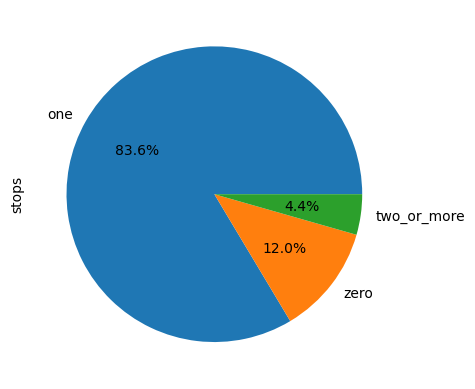

In [28]:
df['stops'].value_counts().plot(kind='pie',autopct = "%1.1f%%")

<Axes: xlabel='airline', ylabel='price'>

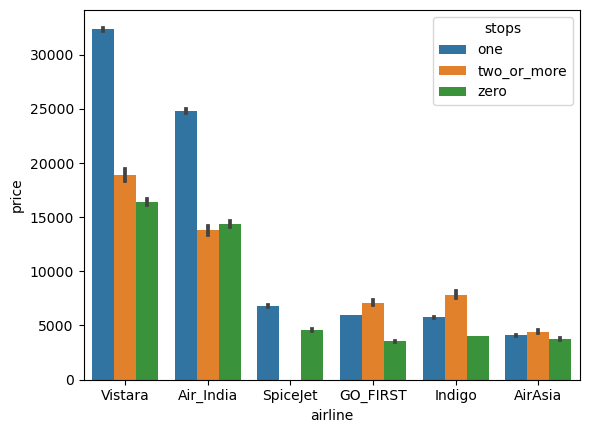

In [29]:
sns.barplot(y = "price", x = "airline",hue="stops",data = df.sort_values("price", ascending = False))

In [30]:
#One Stop Flight is Most Used in Airlines by 83.6 Percentage and the air lines which used one stop most is Vistiria and Air_India

# Preprocessing

C:\Users\shrid\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


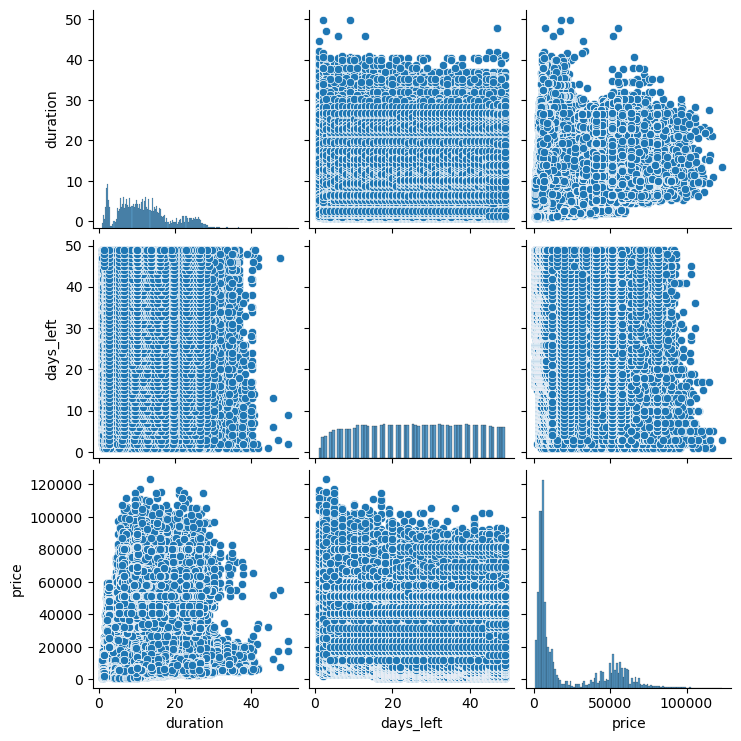

In [31]:
sns.pairplot(df)

In [32]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [33]:
# We will need to use label encoding here.

In [34]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [35]:
df.drop(columns='flight',inplace=True)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
df['airline'] = le.fit_transform(df['airline'])
df['source_city'] = le.fit_transform(df['source_city'])
df['departure_time'] = le.fit_transform(df['departure_time'])
df['stops'] = le.fit_transform(df['stops'])
df['arrival_time'] = le.fit_transform(df['arrival_time'])
df['destination_city'] = le.fit_transform(df['destination_city'])
df['class'] = le.fit_transform(df['class'])

In [38]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


In [39]:
df['airline'].value_counts()

5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: airline, dtype: int64

In [40]:
df.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000,300153.000000
mean,3.104873,2.577592,2.417337,0.284168,3.074086,2.588303,0.688536,12.221021,26.004751,20889.660523
std,1.833265,1.751762,1.754276,0.665825,1.741666,1.744543,0.463093,7.191997,13.561004,22697.767366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.830000,1.000000,1105.000000
25%,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,6.830000,15.000000,4783.000000
50%,3.000000,2.000000,2.000000,0.000000,4.000000,3.000000,1.000000,11.250000,26.000000,7425.000000
75%,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000,16.170000,38.000000,42521.000000
max,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,1.000000,49.830000,49.000000,123071.000000


<Axes: >

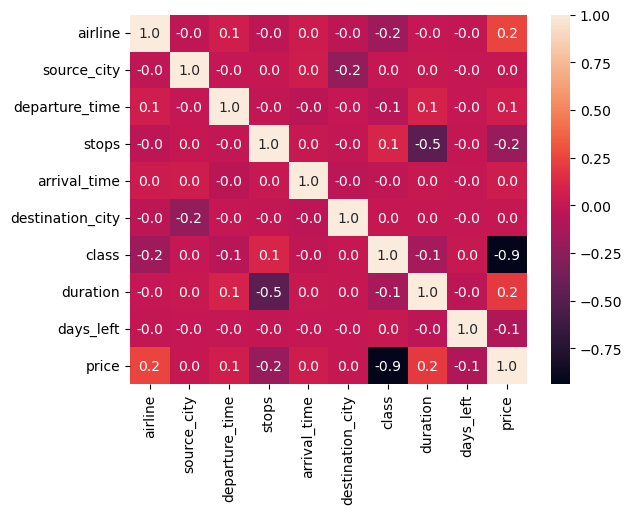

In [41]:
sns.heatmap(df.corr(),annot=True,fmt='.1f')

# Select the dependant(target) and independant variable:

In [42]:
x = df.drop(columns='price')
y = df.price

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(scaler,columns = x.columns)
x.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,0.8,0.4,0.4,1.0,1.0,1.0,1.0,0.027347,0.0
1,0.8,0.4,0.2,1.0,0.8,1.0,1.0,0.030612,0.0
2,0.0,0.4,0.2,1.0,0.2,1.0,1.0,0.027347,0.0
3,1.0,0.4,0.8,1.0,0.0,1.0,1.0,0.028980,0.0
4,1.0,0.4,0.8,1.0,0.8,1.0,1.0,0.030612,0.0


In [44]:
x.describe().T[['min', 'mean', 'std', '50%', 'max']]

,min,mean,std,50%,max
airline,0.0,0.620975,0.366653,0.600000,1.0
source_city,0.0,0.515518,0.350352,0.400000,1.0
departure_time,0.0,0.483467,0.350855,0.400000,1.0
stops,0.0,0.142084,0.332912,0.000000,1.0
arrival_time,0.0,0.614817,0.348333,0.800000,1.0
destination_city,0.0,0.517661,0.348909,0.600000,1.0
class,0.0,0.688536,0.463093,1.000000,1.0
duration,0.0,0.232470,0.146775,0.212653,1.0
days_left,0.0,0.520932,0.282521,0.520833,1.0


# Modelling

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)

In [47]:
x_train.shape

(210107, 9)

In [48]:
y_test.shape

(90046,)

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection  import GridSearchCV

In [50]:
lr_model = LinearRegression()

In [51]:
paras = {'fit_intercept': [True, False]}

In [52]:
gsv_lr = GridSearchCV(LinearRegression(),paras,cv=10,scoring='r2')
gsv_lr.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [53]:
print(f'Best estimator are:{gsv_lr.best_estimator_}')
print(f'Best parameters are:{gsv_lr.best_params_}')
print(f'Best score is: {gsv_lr.best_score_}')

Best estimator are:LinearRegression()
Best parameters are:{'fit_intercept': True}
Best score is: 0.904071125755771


In [54]:
best_lr_model = LinearRegression(fit_intercept=True)
best_lr_model.fit(x_train,y_train)
lr_y_pred = best_lr_model.predict(x_test)

In [73]:
print('train score',best_lr_model.score(x_train,y_train))
print('test score',best_lr_model.score(x_test,y_test))
print('r2 score',metrics.r2_score(y_test,lr_y_pred))
R2_LR=metrics.r2_score(y_test,lr_y_pred)
MAE_LR=metrics.mean_absolute_error(y_test,lr_y_pred)
print('MAE',metrics.mean_absolute_error(y_test,lr_y_pred))
MSE_LR=metrics.mean_squared_error(y_test,lr_y_pred)
print('MSE',metrics.mean_squared_error(y_test,lr_y_pred))
MAPR_LR=metrics.mean_absolute_percentage_error(y_test,lr_y_pred)
print('MAPR',metrics.mean_absolute_percentage_error(y_test,lr_y_pred))

train score 0.9040872733825299
test score 0.9058171828045345
r2 score 0.9058171828045345
MAE 4628.3707536441425
MSE 48614110.155582786
MAPR 0.43623097645417286


In [91]:
pred1=pd.DataFrame({"y_test":y_test,'y_pred':lr_y_pred})
pred1.reset_index(drop=True, inplace=True)
pred1.head()

,y_test,y_pred
0,56702,52408.142142
1,2737,7192.030766
2,10680,9430.227897
3,56476,47708.889575
4,41269,53177.271523


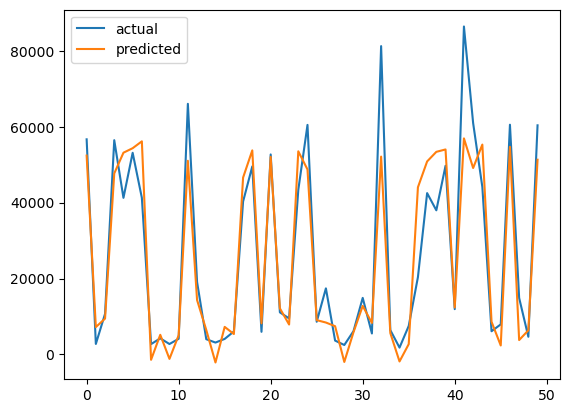

In [92]:
plt.plot(pred1[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
rf_model = RandomForestRegressor()

In [75]:
rf_model.fit(x_train,y_train)
rf_y_pred = rf_model.predict(x_test)

In [100]:
print('train score',rf_model.score(x_train,y_train))
print('test score',rf_model.score(x_test,y_test))
print('r2 score',metrics.r2_score(y_test,rf_y_pred))
R2_rf=metrics.r2_score(y_test,rf_y_pred)
MAE_rf=metrics.mean_absolute_error(y_test,rf_y_pred)
print('MAE',metrics.mean_absolute_error(y_test,rf_y_pred))
MSE_rf=metrics.mean_squared_error(y_test,rf_y_pred)
print('MSE',metrics.mean_squared_error(y_test,rf_y_pred))
MAPR_rf=metrics.mean_absolute_percentage_error(y_test,rf_y_pred)
print('MAPR',metrics.mean_absolute_percentage_error(y_test,rf_y_pred))

train score 0.9975077805825701
test score 0.98541094599391
r2 score 0.98541094599391
MAE 1103.4108500941234
MSE 7530395.66703421
MAPR 0.07300737630998703


paras_rf = {'n_estimators': [100],'max_depth': [None, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]}
gsv_rf = GridSearchCV(RandomForestRegressor(), paras_rf, cv=10, scoring='r2',n_jobs=-1)
gsv_rf.fit(x_train, y_train)

print(f'Best estimator are:{gsv_rf.best_estimator_}')
print(f'Best parameters are:{gsv_rf.best_params_}')
print(f'Best score is: {gsv_rf.best_score_}')

In [93]:
pred2=pd.DataFrame({"y_test":y_test,'y_pred':rf_y_pred})
pred2.reset_index(drop=True, inplace=True)
pred2.head()

,y_test,y_pred
0,56702,56702.00
1,2737,4634.40
2,10680,12137.59
3,56476,55177.71
4,41269,45279.75


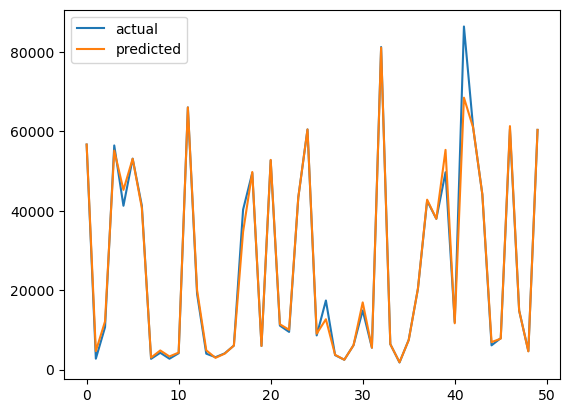

In [94]:
plt.plot(pred2[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
paras_dt = {'max_depth': [None, 10, 20],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), paras_dt, cv=5, scoring='r2')
grid_search_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2')

In [65]:
print(f'Best estimator are:{grid_search_dt.best_params_}')
print(f'Best parameters are:{grid_search_dt.best_score_}')
print(f'Best score is:{grid_search_dt.best_estimator_}')

Best estimator are:{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best parameters are:0.9817436854104928
Best score is:DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)


In [66]:
best_dt_model = DecisionTreeRegressor(max_depth=None,min_samples_leaf=4, min_samples_split=10)

In [71]:
best_dt_model.fit(x_train,y_train)
dt_y_pred = best_lr_model.predict(x_test)

In [99]:
print('train score',best_dt_model.score(x_train,y_train))
print('test score',best_dt_model.score(x_test,y_test))
print('r2 score',metrics.r2_score(y_test,dt_y_pred))
R2_dt=metrics.r2_score(y_test,dt_y_pred)
MAE_dt=metrics.mean_absolute_error(y_test,dt_y_pred)
print('MAE',metrics.mean_absolute_error(y_test,dt_y_pred))
MSE_dt=metrics.mean_squared_error(y_test,dt_y_pred)
print('MSE',metrics.mean_squared_error(y_test,dt_y_pred))
MAPR_dt=metrics.mean_absolute_percentage_error(y_test,dt_y_pred)
print('MAPR',metrics.mean_absolute_percentage_error(y_test,dt_y_pred))

train score 0.9912806202776183
test score 0.9830106151568506
r2 score 0.9058171828045345
MAE 4628.3707536441425
MSE 48614110.155582786
MAPR 0.43623097645417286


In [95]:
pred3=pd.DataFrame({"y_test":y_test,'y_pred':dt_y_pred})
pred3.reset_index(drop=True, inplace=True)
pred3.head()

,y_test,y_pred
0,56702,52408.142142
1,2737,7192.030766
2,10680,9430.227897
3,56476,47708.889575
4,41269,53177.271523


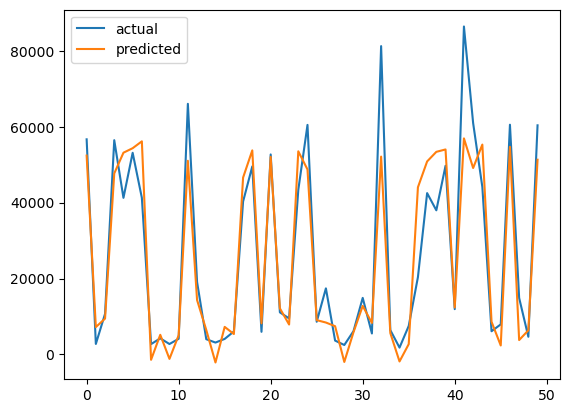

In [96]:
plt.plot(pred3[0:50])
plt.legend(['actual','predicted'])
plt.show()

In [101]:
models = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
MSE = [MSE_LR, MSE_dt, MSE_rf]
MAPR = [MAPR_LR, MAPR_dt, MAPR_rf]
MAE = [MAE_LR, MAE_dt, MAE_rf]
R2 = [R2_LR, R2_dt, R2_rf]

In [102]:
results = pd.DataFrame({'Model': models,'MSE': MSE,'MAPR': MAPR,'MAE': MAE,'R2 Squared': R2})

In [103]:
results.head()

,Model,MSE,MAPR,MAE,R2 Squared
0,Linear Regression,7.530396e+06,0.073007,1103.410850,0.985411
1,Decision Tree Regressor,4.861411e+07,0.436231,4628.370754,0.905817
2,Random Forest Regressor,7.530396e+06,0.073007,1103.410850,0.985411


In [ ]:
#Even though random forest reg have R2 squared value greater than the other model we will be conclude Decision Tree Regressor as a
#better model as we were able to find the best model using the best estimator.